




# Random_Forest

In [ ]:
import os
import zipfile
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import joblib

In [ ]:
from google.colab import files

uploaded=files.upload()
zip_path="/content/combined_dataset.zip"
extract_path="/content/combined_dataset"

Saving combined_dataset.zip to combined_dataset.zip


In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:",extract_path)
print("Classes:",os.listdir(extract_path))

Dataset extracted to: /content/combined_dataset
Classes: ['fashion', 'plante', 'animal', 'Paysage', 'Feu', 'Personne', 'nourriture', 'documents', 'vehicule', 'devices']


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
train_path="/content/train_dataset"
test_path="/content/test_dataset"

# creation folder pour le train et le test datasets
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
# list des class dans la dataset
classes=os.listdir(extract_path)
#ta9sim
for class_name in classes:
    class_path=os.path.join(extract_path, class_name)
    if os.path.isdir(class_path):
        all_files=os.listdir(class_path)
        #80% train,20% test
        train_files,test_files=train_test_split(all_files, test_size=0.2,random_state=42)
        os.makedirs(os.path.join(train_path, class_name),exist_ok=True)
        os.makedirs(os.path.join(test_path, class_name),exist_ok=True)
        for file_name in train_files:
            shutil.move(os.path.join(class_path,file_name),os.path.join(train_path,class_name,file_name))
        for file_name in test_files:
            shutil.move(os.path.join(class_path,file_name),os.path.join(test_path,class_name,file_name))

print("Dataset hasbeen split into 'train_dataset'and'test_dataset'")

Dataset has been split into 'train_dataset' and 'test_dataset'.


In [ ]:
# charger et prétraiter des images
def load_dataset(directory, target_size=(64, 64)):
    images=[]
    labels=[]
    class_names =sorted(os.listdir(directory))
    class_mapping={name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_dir=os.path.join(directory,class_name)
        for img_name in os.listdir(class_dir):
            img_path=os.path.join(class_dir,img_name)
            img=load_img(img_path,target_size=target_size)
            img_array=img_to_array(img)/255.0
            images.append(img_array.flatten())
            labels.append(class_mapping[class_name])

    return np.array(images),np.array(labels),class_names

# load training dataset
train_dir='/content/train_dataset'
X,y,class_names=load_dataset(train_dir)
print(f"Loaded {len(X)} images belonging to {len(class_names)} classes.")


Loaded 5564 images belonging to 10 classes.


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 4451, Testing samples: 1113


In [ ]:
# trainer Random Forest
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
#################################
# enregistrement du model
joblib.dump(rf_model, 'random_forest_model.joblib')
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


Test Accuracy: 0.6972147349505841
Confusion Matrix:
 [[ 83  13   3  13   3   0   0  12   0   2]
 [  8  91   1   8   2   0   2   1   0   1]
 [  9   3  74  15   5   2   4   7   0   4]
 [  6  13   4  49   5   0   7   8   1  14]
 [  5   7  12   7  70   6   5   7   0   2]
 [  0   0   1   0   9  81   0   0   0   0]
 [  0   3   0  15   0   0  78   2   0   3]
 [ 15   3   0  14   2   0  11  59   0   3]
 [  0   0   0   0   0   0   0   3 105   0]
 [  0   4   5   6   1   0   5   5   0  86]]
Classification Report:
               precision    recall  f1-score   support

         Feu       0.66      0.64      0.65       129
     Paysage       0.66      0.80      0.73       114
    Personne       0.74      0.60      0.66       123
      animal       0.39      0.46      0.42       107
     devices       0.72      0.58      0.64       121
   documents       0.91      0.89      0.90        91
     fashion       0.70      0.77      0.73       101
  nourriture       0.57      0.55      0.56       107
     

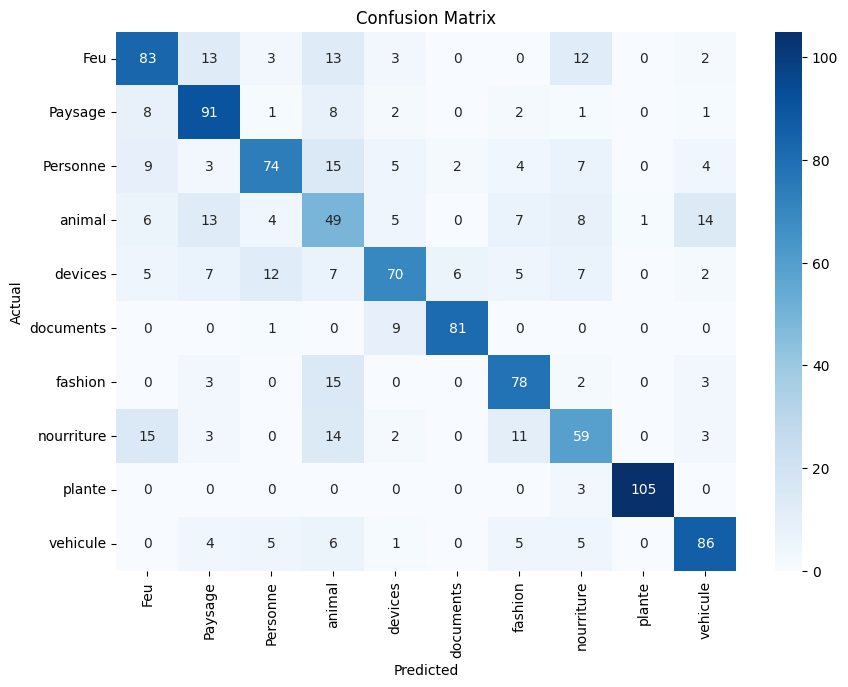

In [ ]:
# Evaluation du test
y_pred = rf_model.predict(X_test)
###########################################
# Métrique
print("Test Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred,target_names=class_names))
############################################
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
test_dir='/content/test_dataset'
X_test_new, y_test_new, _=load_dataset(test_dir)

# Charger le modèle
loaded_rf_model=joblib.load('random_forest_model.joblib')

# Prédire sur le nouvel ensemble de données de test
y_pred_new=loaded_rf_model.predict(X_test_new)

# Evaluate
print("Test Accuracy on New Data:",accuracy_score(y_test_new,y_pred_new))
print("Confusion Matrix:\n",confusion_matrix(y_test_new,y_pred_new))
print("Classification Report:\n",classification_report(y_test_new, y_pred_new,target_names=class_names))

Test Accuracy on New Data: 0.8817858954845256
Confusion Matrix:
 [[171   8   2  11   2   0   0   6   0   2]
 [  6 183   0   6   1   0   0   0   0   1]
 [  6   2 163  11   5   2   3   4   0   1]
 [  5   5   5 163   2   0   5   3   0  11]
 [  4   1   9   4 163   3   1   4   0   6]
 [  0   0   0   0   5 187   0   0   0   0]
 [  1   2   1  14   0   0 171   4   0   5]
 [  8   2   3   7   2   0   2 166   1   3]
 [  0   0   0   0   0   0   0   1 200   0]
 [  1   4   3   6   1   0   7   3   0 171]]
Classification Report:
               precision    recall  f1-score   support

         Feu       0.85      0.85      0.85       202
     Paysage       0.88      0.93      0.91       197
    Personne       0.88      0.83      0.85       197
      animal       0.73      0.82      0.77       199
     devices       0.90      0.84      0.87       195
   documents       0.97      0.97      0.97       192
     fashion       0.90      0.86      0.88       198
  nourriture       0.87      0.86      0.86    

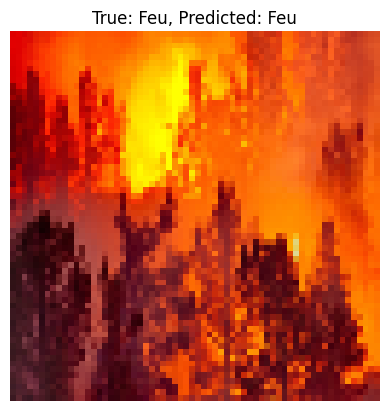

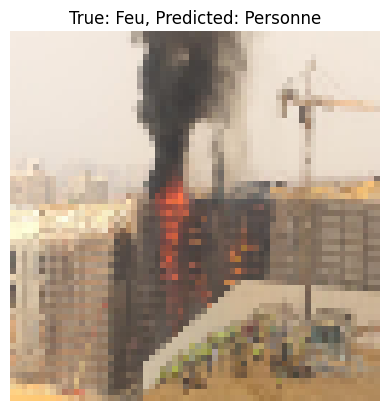

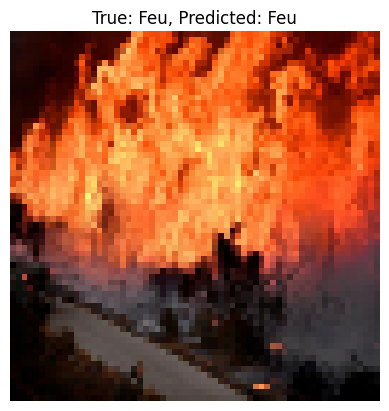

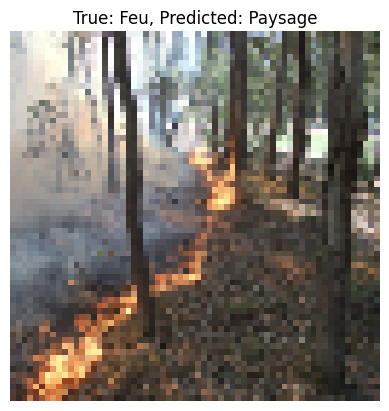

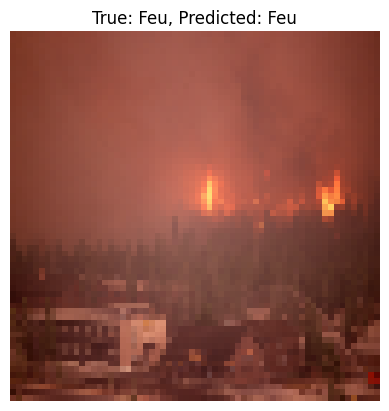

In [ ]:
# quelques prédictions
for i in range(5):
    img = X_test_new[i].reshape(64, 64, 3)
    predicted_class = class_names[y_pred_new[i]]
    true_class = class_names[y_test_new[i]]
    plt.imshow(img)
    plt.title(f"True:{true_class},Predicted:{predicted_class}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()
print(uploaded)

Saving WIN_20241022_14_21_01_Pro.jpg to WIN_20241022_14_21_01_Pro.jpg
{'WIN_20241022_14_21_01_Pro.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe10\xcaExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x011\x00\x02\x00\x00\x00\x0b\x00\x00\x10J\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x10V\x88%\x00\x04\x00\x00\x00\x01\x00\x00 \xa2\xea\x1c\x00\x07\x00\x00\x10\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

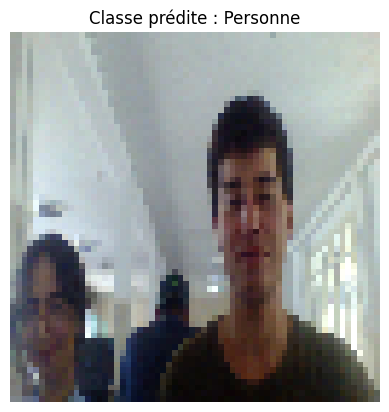

Classe prédite pour l'image : Personne


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# distingtion de la classe d'une image
def predict_image_class(image_path, model, class_names):
    # Charger l'image
    img=load_img(image_path, target_size=(64,64))
    img_array=img_to_array(img)
    img_array=img_array/255.0
    img_flat=img_array.reshape(1,-1)

    # Prédire la classe
    prediction = model.predict(img_flat)
    predicted_class = class_names[prediction[0]]
    plt.imshow(img)
    plt.title(f"Classe prédite : {predicted_class}")
    plt.axis('off')
    plt.show()
    return predicted_class

# Exemple
image_path="/content/WIN_20241022_14_21_01_Pro.jpg"
predicted_class=predict_image_class(image_path, rf_model, class_names)
print(f"Classe prédite pour l'image : {predicted_class}")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# si X_train est un tableau NumPy
if isinstance(X_train,(np.ndarray, np.generic)):
    feature_columns=[f"feature_{i}" for i in range(X_train.shape[1])]
    df=pd.DataFrame(X_train, columns=feature_columns)
else:
    df=X_train.copy()

# Ajouter les étiquettes comme colonne au DataFrame
df['label']=y_train

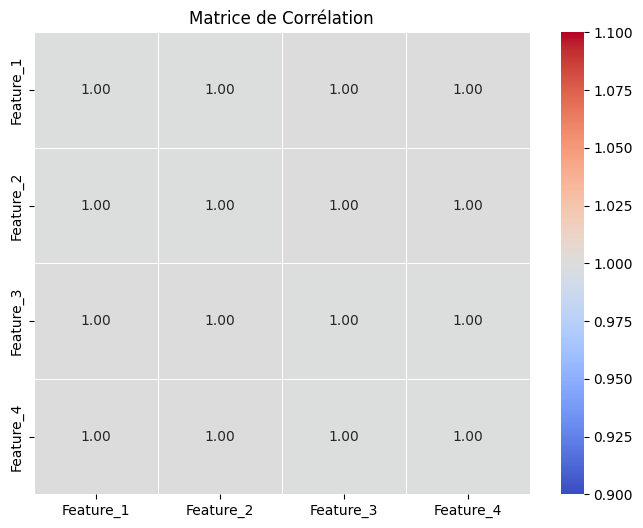

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un DataFrame avec des données numériques
data={
    'Feature_1':[0.1, 0.2, 0.3, 0.4, 0.5],
    'Feature_2':[1.1, 1.2, 1.3, 1.4, 1.5],
    'Feature_3':[2.1, 2.2, 2.3, 2.4, 2.5],
    'Feature_4':[3.1, 3.2, 3.3, 3.4, 3.5]
}

df=pd.DataFrame(data)

# matrice de corrélation
corr_matrix=df.corr()

# Affichage de la matrice
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


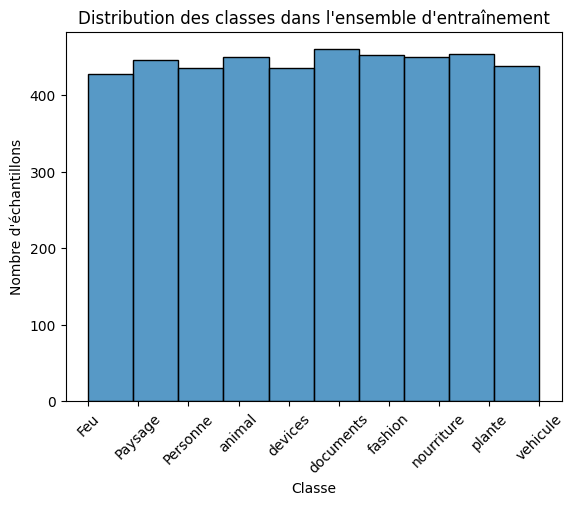

In [ ]:

# Distribution des classes
sns.histplot(y_train, bins=len(class_names), kde=False)
plt.title("Distribution des classes dans l'ensemble d'entraînement")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.show()


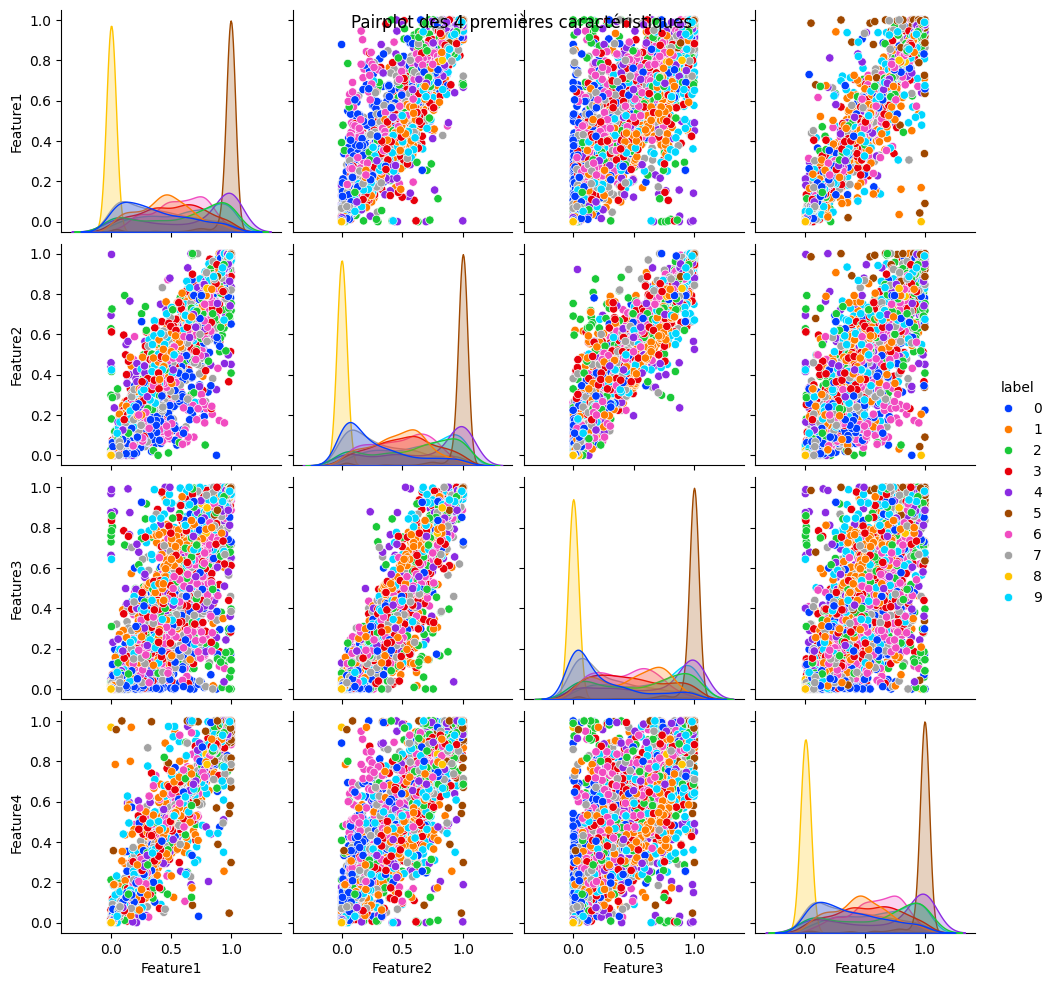

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Réduction de dimensions pour visualisation
small_df = pd.DataFrame(X_train[:, :4], columns=['Feature1','Feature2','Feature3','Feature4'])
small_df['label'] = y_train
# Pairplot
sns.pairplot(small_df, hue='label', palette='bright')
plt.suptitle("Pairplot des 4 premières caractéristiques")
plt.show()


<ipython-input-21-1a1648091637>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Feature', data=df, palette='Set2')


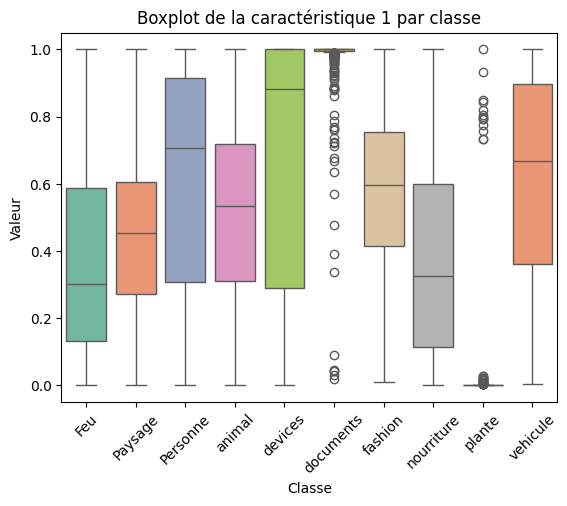

In [ ]:
# Boxplot
df = pd.DataFrame(X_train,columns=[f'Feature{i+1}' for i in range(X_train.shape[1])])
df['label']=y_train
feature_index=0
df['Feature']=X_train[:,feature_index]
sns.boxplot(x='label',y='Feature',data=df,palette='Set2')
plt.title(f"Boxplot de la caractéristique {feature_index + 1} par classe")
plt.xlabel("Classe")
plt.ylabel("Valeur")
plt.xticks(ticks=range(len(class_names)),labels=class_names,rotation=45)
plt.show()

<ipython-input-22-529111460bc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


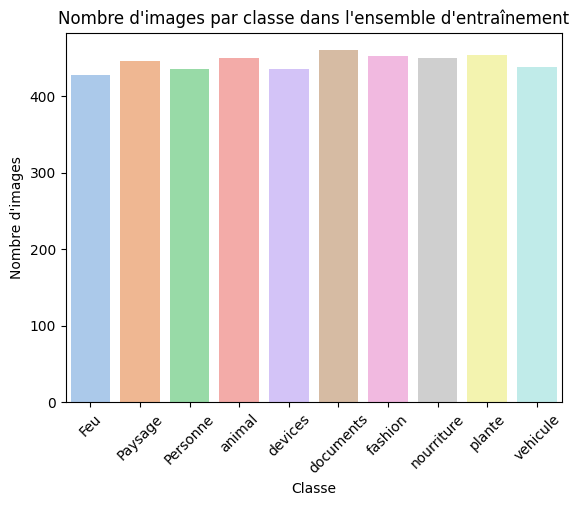

In [ ]:
# Countplot
sns.countplot(x='label', data=df, palette='pastel')
plt.title("Nombre d'images par classe dans l'ensemble d'entraînement")
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.show()


Loaded 5564 images belonging to 10 classes.
Training samples: 4451, Testing samples: 1113
Cross-validation scores: [0.71428571 0.71877808 0.70889488 0.67446043]
Mean cross-validation score: 0.7041047754788083
Random Forest model saved successfully!
Test Accuracy: 0.6972147349505841
Confusion Matrix:
 [[ 83  13   3  13   3   0   0  12   0   2]
 [  8  91   1   8   2   0   2   1   0   1]
 [  9   3  74  15   5   2   4   7   0   4]
 [  6  13   4  49   5   0   7   8   1  14]
 [  5   7  12   7  70   6   5   7   0   2]
 [  0   0   1   0   9  81   0   0   0   0]
 [  0   3   0  15   0   0  78   2   0   3]
 [ 15   3   0  14   2   0  11  59   0   3]
 [  0   0   0   0   0   0   0   3 105   0]
 [  0   4   5   6   1   0   5   5   0  86]]
Classification Report:
               precision    recall  f1-score   support

         Feu       0.66      0.64      0.65       129
     Paysage       0.66      0.80      0.73       114
    Personne       0.74      0.60      0.66       123
      animal       0.39   

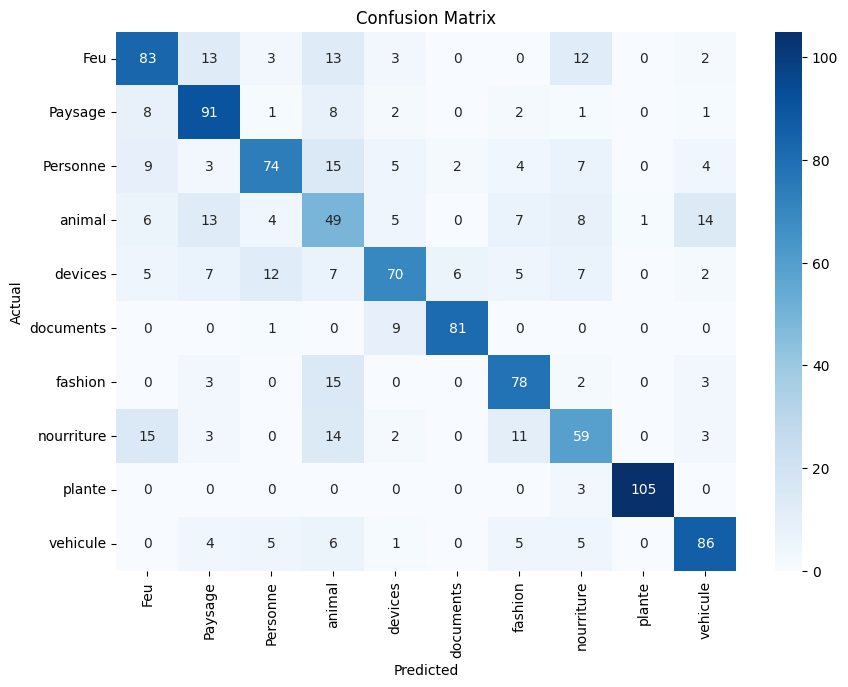

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# fonction pour charger et prétraiter des images
def load_dataset(directory, target_size=(64, 64)):
    images=[]
    labels=[]
    class_names=sorted(os.listdir(directory))
    class_mapping={name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_dir=os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path=os.path.join(class_dir, img_name)
            img=load_img(img_path, target_size=target_size)
            img_array=img_to_array(img)/255.0
            images.append(img_array.flatten())
            labels.append(class_mapping[class_name])

    return np.array(images),np.array(labels),class_names

# charger les données d'entraînement
train_dir='/content/train_dataset'
X, y, class_names=load_dataset(train_dir)
print(f"Loaded {len(X)} images belonging to {len(class_names)} classes.")

# diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Validation croisée avec 4 plis (CV=4)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=cv)

print("Cross-validation scores:", cross_val_scores)
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

# entraîner le modèle sur l'ensemble d'entraînement complet
rf_model.fit(X_train, y_train)

# sauvegarder le modèle entraîné
joblib.dump(rf_model, 'random_forest_model.joblib')
print("Random Forest model saved successfully!")

# evaluation sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# afficher les métriques
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#CNN

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combined_dataset.zip to combined_dataset.zip


In [ ]:
import zipfile
import os

zip_path = "/content/combined_dataset.zip"
extract_path = "/content/combined_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dossier extrait avec succès !")
print(os.listdir(extract_path))

Dossier extrait avec succès !
['nourriture', 'devices', 'plante', 'vehicule', 'Personne', 'documents', 'fashion', 'Feu', 'Paysage', 'animal']


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
train_path = "/content/train_dataset"
test_path = "/content/test_dataset"

# creation folder pour le train et le test datasets
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# list des class dans la dataset
classes = os.listdir(extract_path)
#ta9sim
for class_name in classes:
    class_path = os.path.join(extract_path, class_name)

    if os.path.isdir(class_path):

        all_files = os.listdir(class_path)

        #80% train, 20% test
        train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

        for file_name in train_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(train_path, class_name, file_name))

        for file_name in test_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(test_path, class_name, file_name))

print("Dataset has been split into 'train_dataset' and 'test_dataset'.")

Dataset has been split into 'train_dataset' and 'test_dataset'.


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# les transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.ImageFolder(root="/content/train_dataset", transform=transform)
print(dataset.classes)
#creation un DataLoader
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
#affichage
print(f"Nombre total d'images : {len(dataset)}")
print(f"Classes disponibles : {dataset.classes}")

['Feu', 'Paysage', 'Personne', 'animal', 'devices', 'documents', 'fashion', 'nourriture', 'plante', 'vehicule']
Nombre total d'images : 4800
Classes disponibles : ['Feu', 'Paysage', 'Personne', 'animal', 'devices', 'documents', 'fashion', 'nourriture', 'plante', 'vehicule']


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Définir le modèle CNN
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# nombre de class initiale
num_classes = len(dataset.classes)
model = CNNModel(num_classes)
print(model)

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()  # Fonction de perte pour la classification multi-classes
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# GPU est disponible?
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# entraînement
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Époque {epoch + 1}/{num_epochs}, Perte: {running_loss / len(train_loader):.4f}")

# Sauvegarder le modèle
torch.save(model.state_dict(), "cnn_model.pth")

Époque 1/1, Perte: 1.1511


In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving photo_5951 6739350.jpg to photo_5951 6739350.jpg
{'photo_5951 6739350.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x04\x1b\x03\x0b\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13

In [ ]:
from PIL import Image
import torch
from torchvision import transforms

print(dataset.classes)

# Affiche les classes et les indices
for idx, class_name in enumerate(dataset.classes):
    print(f"Classe {idx+1}: {class_name}")

# Fonction de prédiction
def predict_image(image_path, model, transform):
    model.eval()
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return dataset.classes[predicted.item()]

# test model sur une image téléchargée
image_path = "photo_5951 6739350.jpg"
predicted_class = predict_image(image_path, model, transform)
print(f"L'image appartient à la classe : {predicted_class}")

['Feu', 'Paysage', 'Personne', 'animal', 'devices', 'documents', 'fashion', 'nourriture', 'plante', 'vehicule']
Classe 1: Feu
Classe 2: Paysage
Classe 3: Personne
Classe 4: animal
Classe 5: devices
Classe 6: documents
Classe 7: fashion
Classe 8: nourriture
Classe 9: plante
Classe 10: vehicule
L'image appartient à la classe : Personne


Classification Report:
               precision    recall  f1-score   support

         Feu       0.69      0.85      0.76       480
     Paysage       0.68      0.87      0.77       480
    Personne       0.73      0.55      0.63       480
      animal       0.60      0.75      0.67       480
     devices       0.94      0.24      0.38       480
   documents       0.89      0.99      0.93       480
     fashion       0.86      0.74      0.80       480
  nourriture       0.84      0.70      0.76       480
      plante       1.00      0.99      0.99       480
    vehicule       0.67      0.96      0.79       480

    accuracy                           0.76      4800
   macro avg       0.79      0.76      0.75      4800
weighted avg       0.79      0.76      0.75      4800



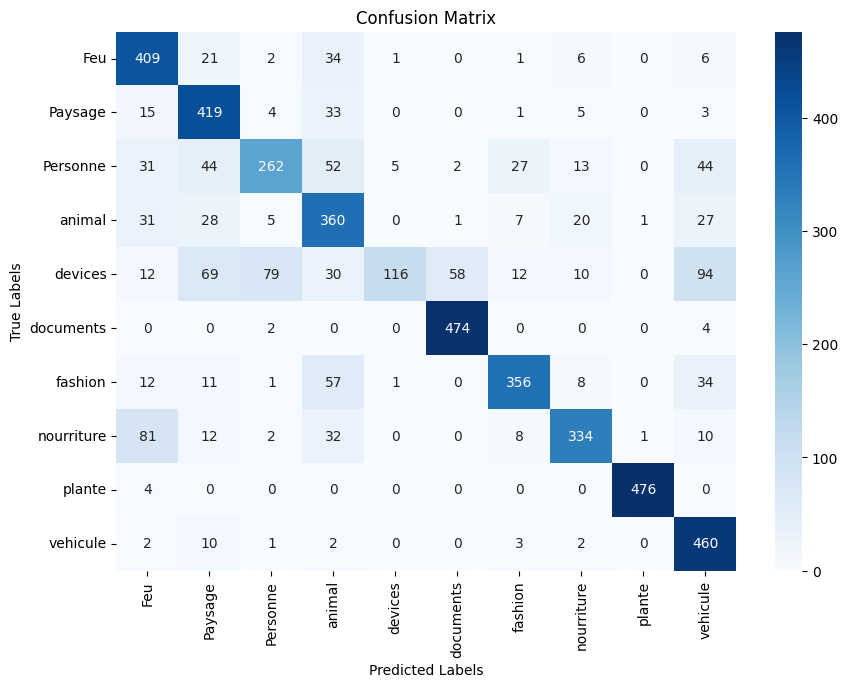

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# collection des predictions et labels
all_predictions = []
all_labels = []

model.eval() #le model est en mode evaluation
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# calcul de la précision, rappel et F1-score pour chaque classe
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predictions, target_names=dataset.classes)
print("Classification Report:\n", report)

#matrice confusion
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-15-e1123456d9e4>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("cnn_model.pth"))


Précision sur le jeu de données de test : 73.58%


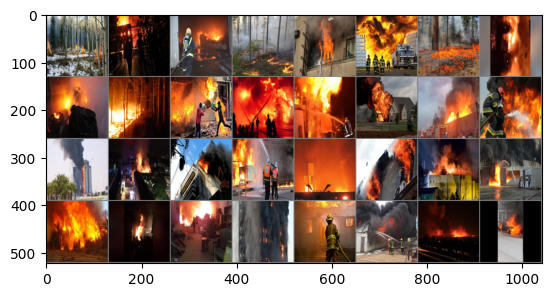

Prédictions: ['Paysage', 'Feu', 'Feu', 'Paysage', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Personne', 'Feu', 'Paysage', 'animal', 'Feu', 'Paysage', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'animal', 'Feu', 'animal', 'Feu', 'Paysage']
Labels: ['Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu', 'Feu']


In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 2. les transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 3. dataset de test
dataset_path = "test_dataset"
test_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 4. charger le modele entraîné
model = CNNModel(num_classes=len(test_dataset.classes))
model.load_state_dict(torch.load("cnn_model.pth"))
model.to(device)
model.eval()

# 5. Prédictions de jeu de données de test
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # prédictions
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # calcul de la précision
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Précision sur le jeu de données de test : {accuracy * 100:.2f}%")

# des prédictions pour quelques exemples
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# quelques images de test et leurs prédictions
data_iter = iter(test_loader)
images, labels = next(data_iter)

#images
imshow(torchvision.utils.make_grid(images))
# prédictions
_, predicted = torch.max(model(images.to(device)), 1)
print(f"Prédictions: {[test_dataset.classes[i] for i in predicted]}")
print(f"Labels: {[test_dataset.classes[i] for i in labels]}")

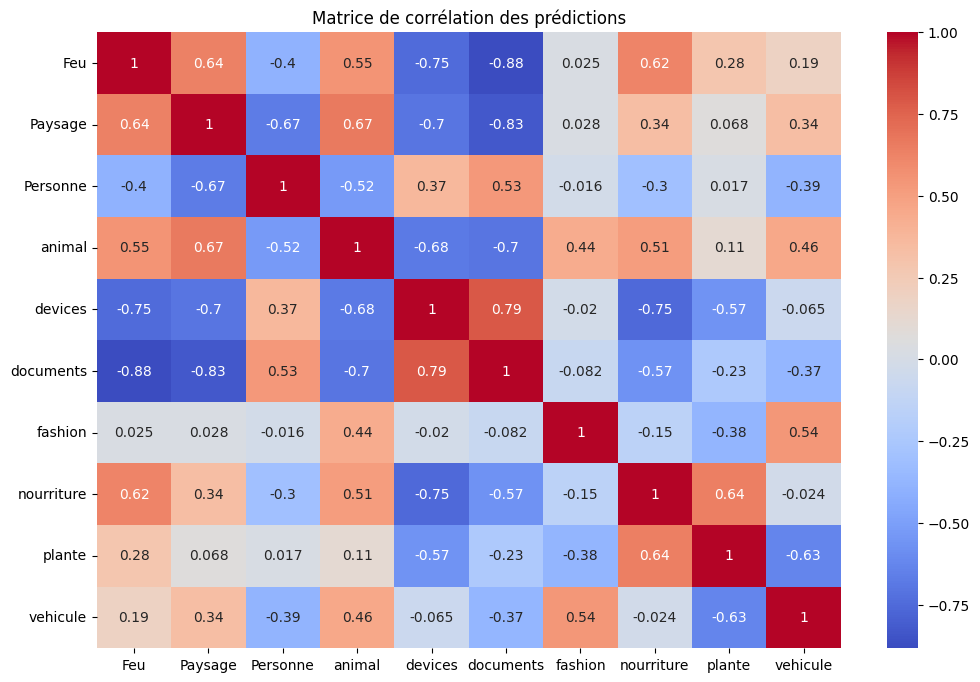

In [ ]:
# matrice de corrélation

with torch.no_grad():
    outputs_all = []
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        outputs_all.append(outputs.cpu().numpy())

outputs_all = np.concatenate(outputs_all, axis=0)
correlation_matrix = np.corrcoef(outputs_all.T)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.title("Matrice de corrélation des prédictions")
plt.show()

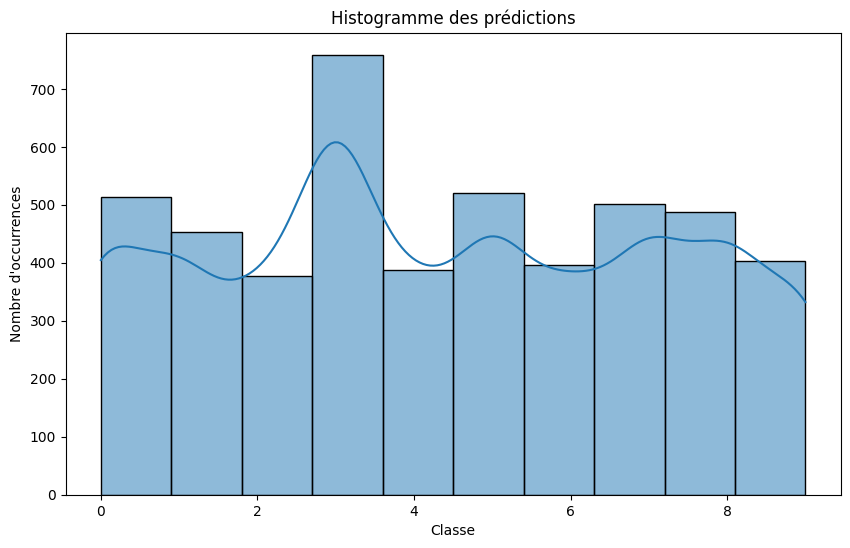

In [ ]:
#histogramme des prédictions
plt.figure(figsize=(10, 6))
sns.histplot(all_predictions, kde=True, bins=len(test_dataset.classes))
plt.xlabel("Classe")
plt.ylabel("Nombre d'occurrences")
plt.title("Histogramme des prédictions")
plt.show()

Taille de outputs_all : (1200, 10)
Taille de all_labels : 1200
Taille de all_predictions : 1200


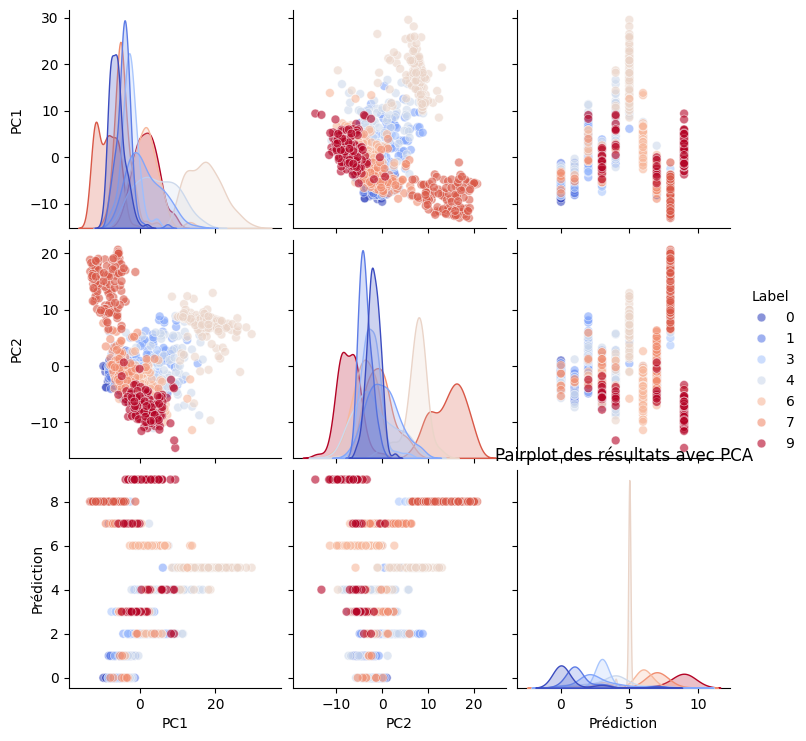

In [ ]:
# des listes pour stocker les sorties, labels et prédictions
outputs_all = []
all_labels = []
all_predictions = []

from sklearn.decomposition import PCA
import pandas as pd

# Évaluation du modèle
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        outputs_all.append(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

outputs_all = np.concatenate(outputs_all, axis=0)

# vérifier la taille des variables
print(f"Taille de outputs_all : {outputs_all.shape}")
print(f"Taille de all_labels : {len(all_labels)}")
print(f"Taille de all_predictions : {len(all_predictions)}")

if len(all_labels) == outputs_all.shape[0] == len(all_predictions):
    pca = PCA(n_components=2)
    outputs_2d = pca.fit_transform(outputs_all)

    # creation d'un DataFrame pour la visualisation
    df = pd.DataFrame(outputs_2d, columns=['PC1', 'PC2'])
    df['Label'] = all_labels
    df['Prédiction'] = all_predictions

    # affichage du pairplot
    sns.pairplot(df, hue='Label', palette="coolwarm", plot_kws={'alpha': 0.6, 's': 40})
    plt.title("Pairplot des résultats avec PCA")
    plt.show()
else:
    print("Erreur : Les tailles des données ne correspondent pas. Vérifiez les longueurs.")

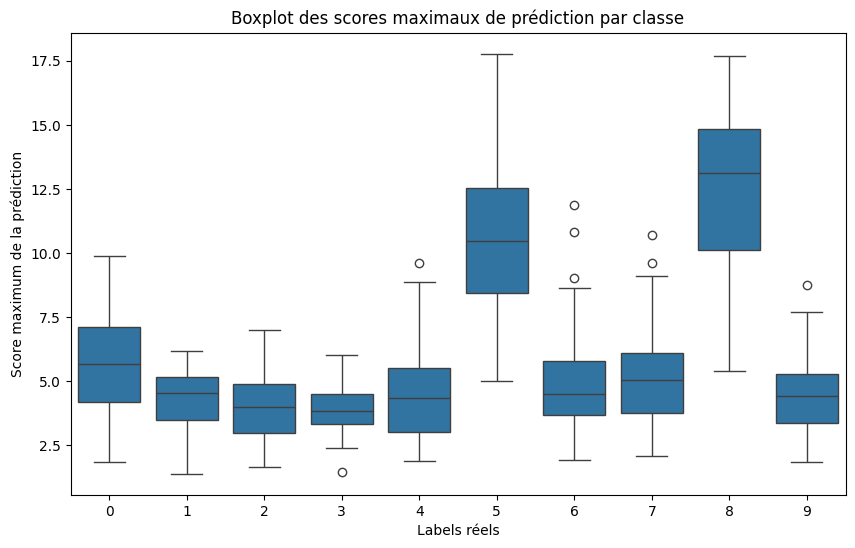

In [ ]:
# boxplot des prédictions
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_labels, y=outputs_all.max(axis=1))
plt.xlabel("Labels réels")
plt.ylabel("Score maximum de la prédiction")
plt.title("Boxplot des scores maximaux de prédiction par classe")
plt.show()

<ipython-input-21-e4f0c2f1ad4d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=all_predictions, palette='coolwarm')


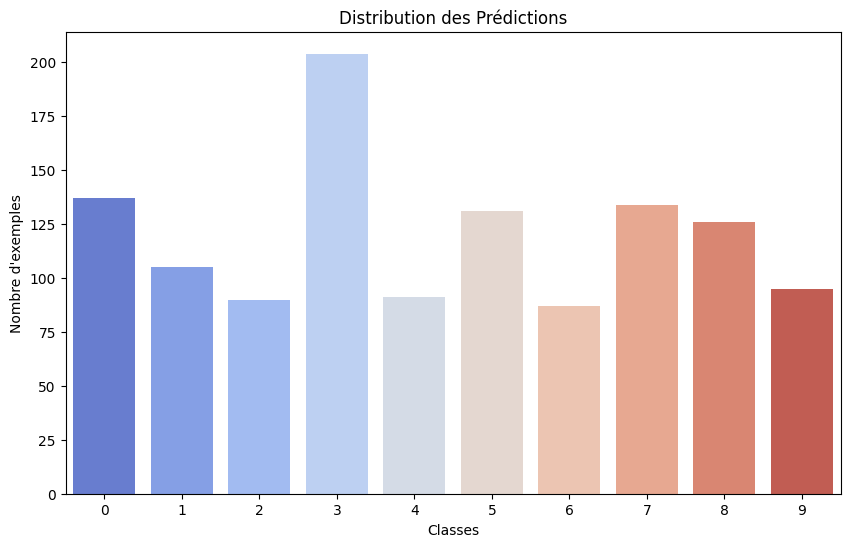

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=all_predictions, palette='coolwarm')
plt.title("Distribution des Prédictions")
plt.xlabel("Classes")
plt.ylabel("Nombre d'exemples")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import torch.optim as optim
import numpy as np

# définir la validation croisée (4 plis)
num_folds = 4
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# liste pour stocker les précisions pour chaque pli
fold_accuracies = []

# validation croisée 4 plis
for fold, (train_idx, val_idx) in enumerate(skf.split(np.arange(len(dataset)), dataset.targets)):
    print(f"\nEntraînement et validation pour le pli {fold + 1}/{num_folds}...")

    # créer des sous-ensembles pour l'entraînement et la validation
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    val_subset = torch.utils.data.Subset(dataset, val_idx)

    # chargeurs de données pour l'entraînement et la validation
    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

    # réinitialiser le modèle pour chaque pli
    model = CNNModel(num_classes=num_classes).to(device)

    # définir l'optimiseur et la fonction de perte
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Époque {epoch + 1}/{num_epochs}, Perte: {running_loss / len(train_loader):.4f}")

    # Évaluer sur l'ensemble de validation
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculer la précision
    fold_accuracy = accuracy_score(all_labels, all_preds)
    fold_accuracies.append(fold_accuracy)
    print(f"Précision pour le pli {fold + 1}: {fold_accuracy:.4f}")

# Calcul de la précision moyenne à travers les plis
mean_accuracy = np.mean(fold_accuracies)
print(f"\nPrécision moyenne à travers {num_folds} plis: {mean_accuracy:.4f}")


Entraînement et validation pour le pli 1/4...
Époque 1/1, Perte: 1.2334
Précision pour le pli 1: 0.6767

Entraînement et validation pour le pli 2/4...
Époque 1/1, Perte: 1.2080
Précision pour le pli 2: 0.7392

Entraînement et validation pour le pli 3/4...
Époque 1/1, Perte: 1.1208
Précision pour le pli 3: 0.6792

Entraînement et validation pour le pli 4/4...
Époque 1/1, Perte: 1.1905
Précision pour le pli 4: 0.6992

Précision moyenne à travers 4 plis: 0.6985


# ResNet18

In [1]:
from google.colab import files
uploaded = files.upload()

Saving combineddataset.zip to combineddataset.zip


In [3]:
import zipfile
import os
zip_path = "/content/combineddataset.zip"
extract_path = "/content/combineddataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dossier extrait avec succès !")
print(os.listdir(extract_path))

Dossier extrait avec succès !
['fashion', 'plante', 'animal', 'Paysage', 'Feu', 'Personne', 'nourriture', 'documents', 'vehicule', 'devices']


In [4]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

class CustomResNet18(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet18, self).__init__()
        self.base_model = models.resnet18(pretrained=True)
        self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

# Définir les transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
# Charger la dataset
data_dir = "/content/combineddataset"
dataset = datasets.ImageFolder(data_dir, transform=transform)

In [6]:
# entraînement et validation (80%-20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [7]:
# initialisation du modèle
num_classes = len(dataset.classes)
model = CustomResNet18(num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


In [8]:
#entraîner le modèle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Époque {epoch + 1}/{num_epochs}, Perte : {running_loss / len(train_loader):.4f}")

Époque 1/25, Perte : 0.4507
Époque 2/25, Perte : 0.2079
Époque 3/25, Perte : 0.1292
Époque 4/25, Perte : 0.1877
Époque 5/25, Perte : 0.1127
Époque 6/25, Perte : 0.0795
Époque 7/25, Perte : 0.1060
Époque 8/25, Perte : 0.0444
Époque 9/25, Perte : 0.0663
Époque 10/25, Perte : 0.0378
Époque 11/25, Perte : 0.1076
Époque 12/25, Perte : 0.0630
Époque 13/25, Perte : 0.0383
Époque 14/25, Perte : 0.0593
Époque 15/25, Perte : 0.0402
Époque 16/25, Perte : 0.0454
Époque 17/25, Perte : 0.0394
Époque 18/25, Perte : 0.0398
Époque 19/25, Perte : 0.0355
Époque 20/25, Perte : 0.0522
Époque 21/25, Perte : 0.0409
Époque 22/25, Perte : 0.0468
Époque 23/25, Perte : 0.0323
Époque 24/25, Perte : 0.0163
Époque 25/25, Perte : 0.0158


In [9]:
# sauvegarder le modèle
torch.save(model.state_dict(), "custom_resnet18.pth")

In [10]:
# evaluer le modèle
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Précision sur le dataset de test : {100 * correct / total:.2f}%")

Précision sur le dataset de test : 95.50%


In [11]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving WIN_20241123_17_21_31_Pro.jpg to WIN_20241123_17_21_31_Pro.jpg
{'WIN_20241123_17_21_31_Pro.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe10\xcaExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x011\x00\x02\x00\x00\x00\x0b\x00\x00\x10J\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x10V\x88%\x00\x04\x00\x00\x00\x01\x00\x00 \xa2\xea\x1c\x00\x07\x00\x00\x10\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

La classe prédite est : Personne


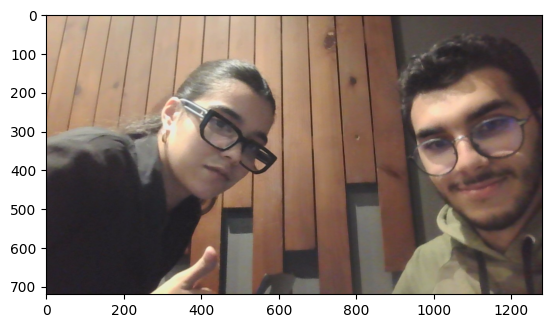

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms

def predict_image(image_path, model, class_names):
    # charger l'image
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)

    # appliquer les mêmes transformations
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


    # transformer l'image
    image_tensor = transform(image).unsqueeze(0)

    # passer l'image dans le modèle
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        output = model(image_tensor)
        _, predicted_class = torch.max(output, 1)

    return class_names[predicted_class.item()]
#prediction
image_path = "WIN_20241123_17_21_31_Pro.jpg"

predicted_class = predict_image(image_path, model, dataset.classes)
print(f"La classe prédite est : {predicted_class}")

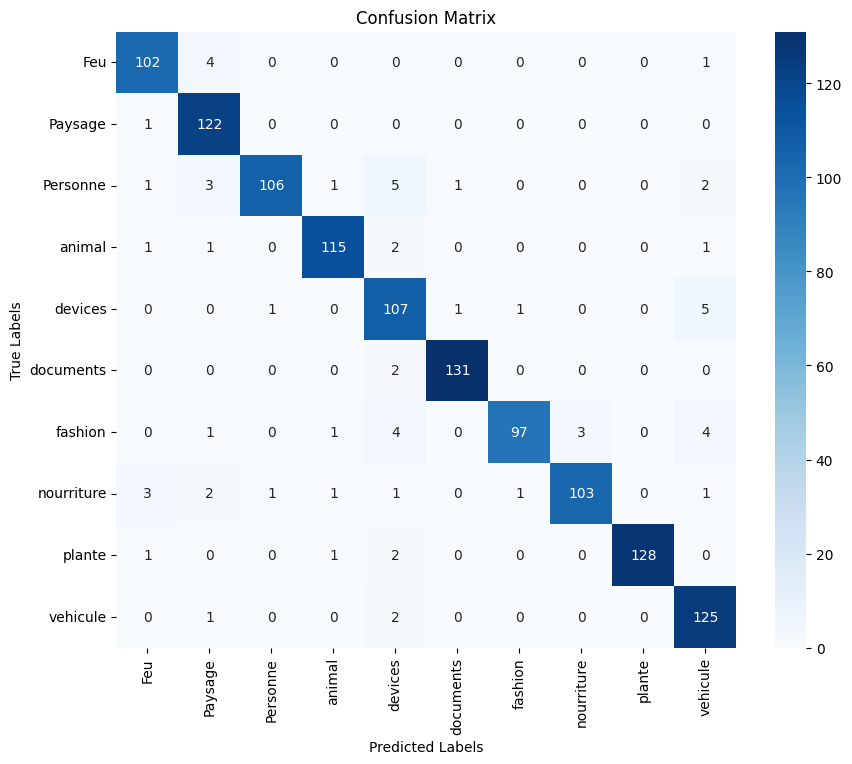


Classification Report:
              precision    recall  f1-score   support

         Feu       0.94      0.95      0.94       107
     Paysage       0.91      0.99      0.95       123
    Personne       0.98      0.89      0.93       119
      animal       0.97      0.96      0.96       120
     devices       0.86      0.93      0.89       115
   documents       0.98      0.98      0.98       133
     fashion       0.98      0.88      0.93       110
  nourriture       0.97      0.91      0.94       113
      plante       1.00      0.97      0.98       132
    vehicule       0.90      0.98      0.94       128

    accuracy                           0.95      1200
   macro avg       0.95      0.94      0.95      1200
weighted avg       0.95      0.95      0.95      1200



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# matrice de confusion
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=dataset.classes,
            yticklabels=dataset.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.classes))

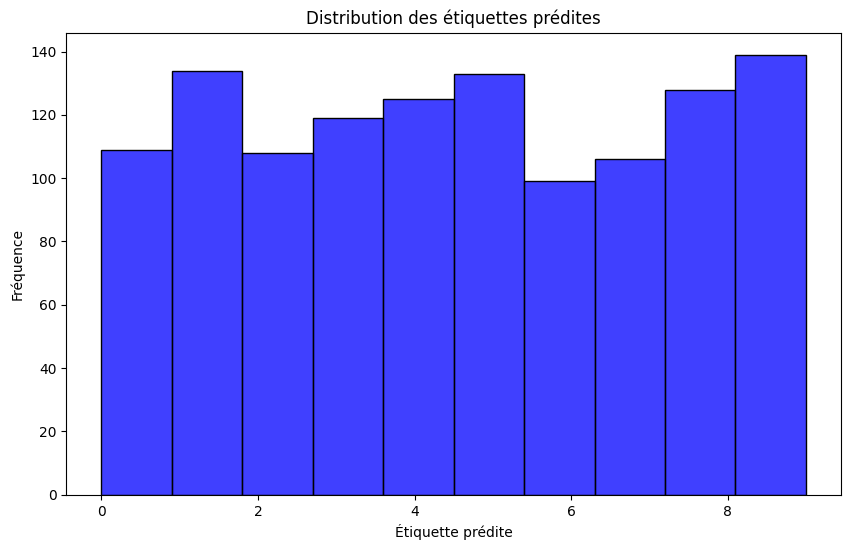

In [ ]:
#histogram  du predicted labels
plt.figure(figsize=(10, 6))
sns.histplot(all_preds, kde=False, color='blue', bins=len(dataset.classes))
plt.title("Distribution des étiquettes prédites")
plt.xlabel("Étiquette prédite")
plt.ylabel("Fréquence")
plt.show()

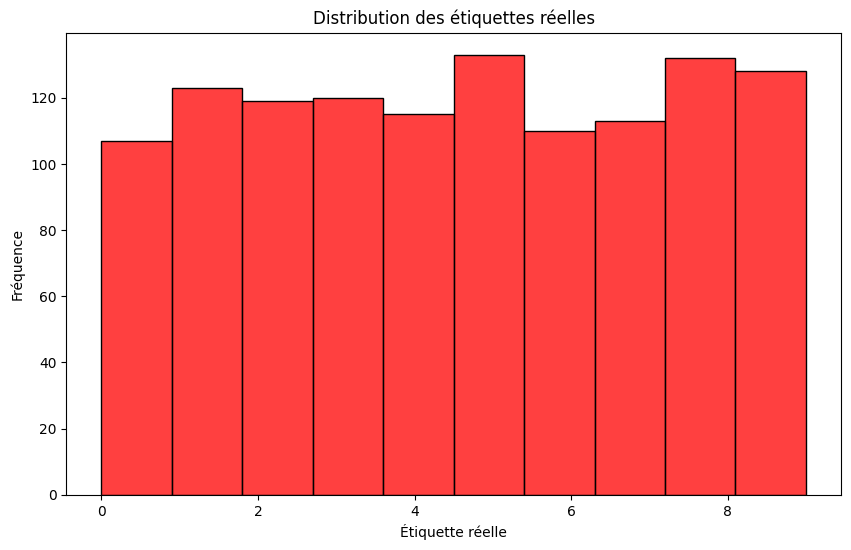

In [ ]:
# histogram du labels reel
plt.figure(figsize=(10, 6))
sns.histplot(all_labels, kde=False, color='red', bins=len(dataset.classes))
plt.title("Distribution des étiquettes réelles")
plt.xlabel("Étiquette réelle")
plt.ylabel("Fréquence")
plt.show()

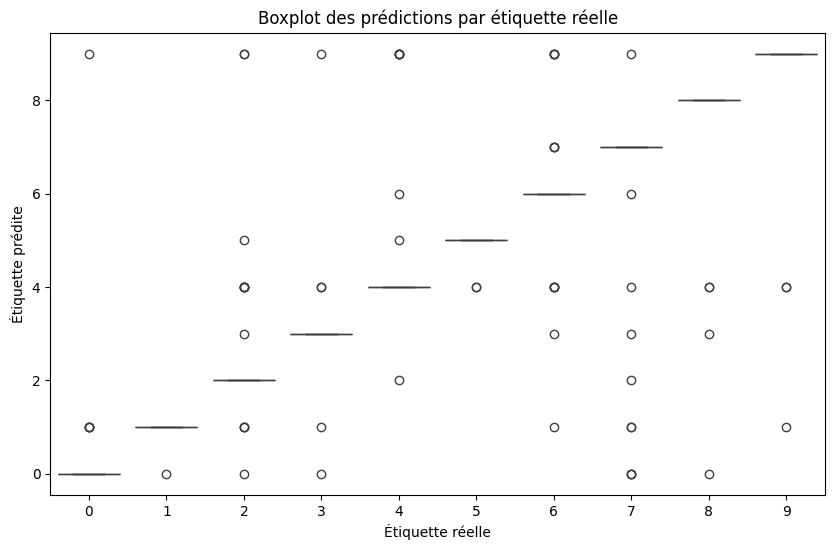

In [ ]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_labels, y=all_preds)
plt.title("Boxplot des prédictions par étiquette réelle")
plt.xlabel("Étiquette réelle")
plt.ylabel("Étiquette prédite")
plt.show()

<ipython-input-22-6bdb17c420f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=all_labels, palette="Set2")


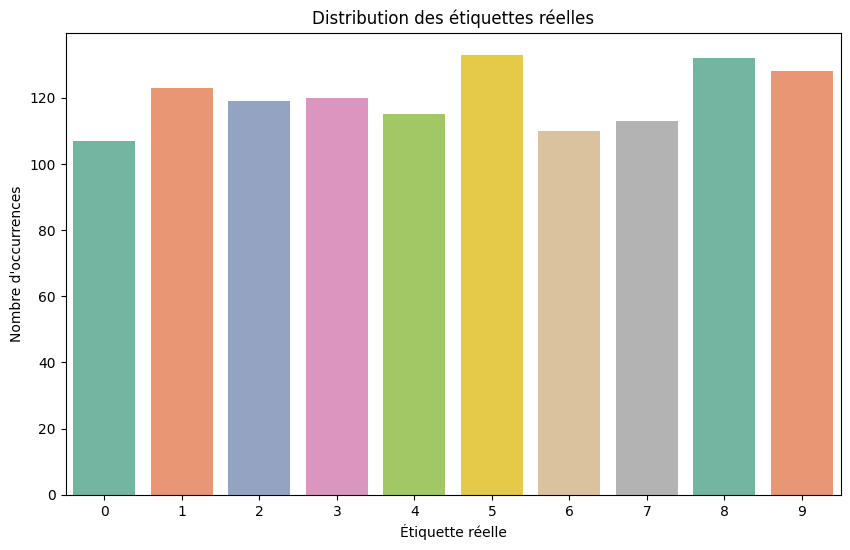

In [ ]:
# counplot
plt.figure(figsize=(10, 6))
sns.countplot(x=all_labels, palette="Set2")
plt.title("Distribution des étiquettes réelles")
plt.xlabel("Étiquette réelle")
plt.ylabel("Nombre d'occurrences")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import torch.optim as optim

# paramètres pour la validation croisée
num_folds = 4  # Nombre de plis (CV=4)
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(np.arange(len(dataset)), dataset.targets)):
    print(f"\nEntraînement et validation pour le pli {fold + 1}/{num_folds}...")

    # créer les sous-ensembles d'entraînement et de validation
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    val_subset = torch.utils.data.Subset(dataset, val_idx)

    # créer des DataLoader pour l'entraînement et la validation
    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

    # réinitialiser le modèle pour chaque pli
    model = CustomResNet18(num_classes=num_classes).to(device)

    # définir l'optimiseur et la fonction de perte
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # entraînement sur ce pli
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Époque {epoch + 1}/{num_epochs}, Perte : {running_loss / len(train_loader):.4f}")

    # evaluation sur le set de validation
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # calculer la précision pour ce pli
    fold_accuracy = accuracy_score(all_labels, all_preds)
    fold_accuracies.append(fold_accuracy)
    print(f"Précision pour le pli {fold + 1} : {fold_accuracy:.4f}")

# calculer la précision moyenne
mean_accuracy = np.mean(fold_accuracies)
print(f"\nPrécision moyenne sur les {num_folds} plis : {mean_accuracy:.4f}")


Entraînement et validation pour le pli 1/4...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Époque 1/25, Perte : 0.4689
Époque 2/25, Perte : 0.2568
Époque 3/25, Perte : 0.1765
Époque 4/25, Perte : 0.1511
Époque 5/25, Perte : 0.1311
Époque 6/25, Perte : 0.0913
Époque 7/25, Perte : 0.0764
Époque 8/25, Perte : 0.0611
Époque 9/25, Perte : 0.0578
Époque 10/25, Perte : 0.0869
Époque 11/25, Perte : 0.0835
Époque 12/25, Perte : 0.0553
Époque 13/25, Perte : 0.0602
Époque 14/25, Perte : 0.0429
Époque 15/25, Perte : 0.0547
Époque 16/25, Perte : 0.0181
Époque 17/25, Perte : 0.0355
Époque 18/25, Perte : 0.0545
Époque 19/25, Perte : 0.0416
Époque 20/25, Perte : 0.0227
Époque 21/25, Perte : 0.0516
Époque 22/25, Perte : 0.0241
Époque 23/25, Perte : 0.0195
Époque 24/25, Perte : 0.0613
Époque 25/25, Perte : 0.0510
Précision pour le pli 1 : 0.9367

Entraînement et validation pour le pli 2/4...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Époque 1/25, Perte : 0.4770
Époque 2/25, Perte : 0.2188
Époque 3/25, Perte : 0.1780
Époque 4/25, Perte : 0.1467
Époque 5/25, Perte : 0.0995
Époque 6/25, Perte : 0.0808
Époque 7/25, Perte : 0.0698
Époque 8/25, Perte : 0.0907
Époque 9/25, Perte : 0.0588
Époque 10/25, Perte : 0.0760
Époque 11/25, Perte : 0.0366
Époque 12/25, Perte : 0.0193
Époque 13/25, Perte : 0.0569
Époque 14/25, Perte : 0.0986
Époque 15/25, Perte : 0.0331
Époque 16/25, Perte : 0.0240
Époque 17/25, Perte : 0.0792
Époque 18/25, Perte : 0.0670
Époque 19/25, Perte : 0.0563
Époque 20/25, Perte : 0.0232
Époque 21/25, Perte : 0.0186
Époque 22/25, Perte : 0.0236
Époque 23/25, Perte : 0.0333
Époque 24/25, Perte : 0.0365
Époque 25/25, Perte : 0.0264
Précision pour le pli 2 : 0.9480

Entraînement et validation pour le pli 3/4...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Époque 1/25, Perte : 0.4891
Époque 2/25, Perte : 0.2385
Époque 3/25, Perte : 0.1638
Époque 4/25, Perte : 0.1395
Époque 5/25, Perte : 0.1165
Époque 6/25, Perte : 0.0937
Époque 7/25, Perte : 0.1013
Époque 8/25, Perte : 0.0554
Époque 9/25, Perte : 0.0706
Époque 10/25, Perte : 0.0512
Époque 11/25, Perte : 0.0474
Époque 12/25, Perte : 0.0676
Époque 13/25, Perte : 0.0842
Époque 14/25, Perte : 0.0314
Époque 15/25, Perte : 0.0417
Époque 16/25, Perte : 0.0413
Époque 17/25, Perte : 0.0582
Époque 18/25, Perte : 0.0448
Époque 19/25, Perte : 0.0201
Époque 20/25, Perte : 0.0349
Époque 21/25, Perte : 0.0475
Époque 22/25, Perte : 0.0541
Époque 23/25, Perte : 0.0315
Époque 24/25, Perte : 0.0336
Époque 25/25, Perte : 0.0146
Précision pour le pli 3 : 0.9460

Entraînement et validation pour le pli 4/4...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Époque 1/25, Perte : 0.5117
Époque 2/25, Perte : 0.2023
Époque 3/25, Perte : 0.1813
Époque 4/25, Perte : 0.1822
Époque 5/25, Perte : 0.0988
Époque 6/25, Perte : 0.0830
Époque 7/25, Perte : 0.0978
Époque 8/25, Perte : 0.0594
Époque 9/25, Perte : 0.0653
Époque 10/25, Perte : 0.0430
Époque 11/25, Perte : 0.0451
Époque 12/25, Perte : 0.0749
Époque 13/25, Perte : 0.0650
Époque 14/25, Perte : 0.0442
Époque 15/25, Perte : 0.0546
Époque 16/25, Perte : 0.0639
Époque 17/25, Perte : 0.0345
Époque 18/25, Perte : 0.0167
Époque 19/25, Perte : 0.0246
Époque 20/25, Perte : 0.0491
Époque 21/25, Perte : 0.0669
Époque 22/25, Perte : 0.0371
Époque 23/25, Perte : 0.0395
Époque 24/25, Perte : 0.0435
Époque 25/25, Perte : 0.0209
Précision pour le pli 4 : 0.9513

Précision moyenne sur les 4 plis : 0.9455
